<a href="https://colab.research.google.com/github/hyo250/gittest/blob/master/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
cd /content/drive/MyDrive/인공지능실습/한경/미션

/content/drive/MyDrive/인공지능실습/한경/미션


In [3]:
#m 제공하는 CIFAR10.nzp 자료를 load하여 X_train, Y_train, X_test, Y_test 자료로 분배합니다.

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

#from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [5]:
# CIFAR10.npz 파일을 로드합니다.
df=np.load('CIFAR10.npz')
list(df)

['train_x', 'train_y', 'test_x', 'test_y']

In [6]:
X_train=df['train_x'] 
Y_train=df['train_y'] 
X_test=df['test_x'] 
Y_test=df['test_y'] 

In [7]:
# load한 zip 파일의 갯수 확인하기
for item in list(df):
  print(np.shape(df[item]))

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [8]:
# [미션3] 자료 샘플 사진으로 확인

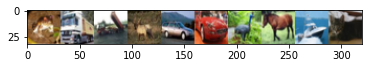

In [9]:
# X_train의 이미지를 가로로 연결하여서 0:10개의 자료를 확인하여 봅니다.
tmp=np.hstack(X_train[0:10])
plt.imshow(tmp)

In [10]:
Y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [11]:
# 꼭 필요하지는 않지만 train r과 test의 레이블y값의 유니크 갯수를 확인해봅니다.\
print('Y_train 유니크 목록: ', np.unique(Y_train))
print('Y_test 유니크 개수: ', len(np.unique(Y_test)))

print('Y_test 유니크 목록: ', np.unique(Y_test))
print('Y_test 유니크 개수: ', len(np.unique(Y_test)))

Y_train 유니크 목록:  [0 1 2 3 4 5 6 7 8 9]
Y_test 유니크 개수:  10
Y_test 유니크 목록:  [0 1 2 3 4 5 6 7 8 9]
Y_test 유니크 개수:  10


In [12]:
#[미션4] 스케일링 유무 확인 및 처리

In [13]:
# 스케일링 유무를 확인하기 위해서 X_train과 X_test의 max, min값을 출력해봄
for item in list(df):
  print(item, 'max: ', df[item].max(), ',', item, 'min: ', df[item].min())

train_x max:  255 , train_x min:  0
train_y max:  9 , train_y min:  0
test_x max:  255 , test_x min:  0
test_y max:  9 , test_y min:  0


In [14]:
# 255값으로 나누어서 스케일링한 자료를 X_train, X_test 자료로 세팅
X_train, X_test= X_train/255.0, X_test/255.0

In [15]:
# 스케일링 유무를 확인하기 위해서 X_train과 X_test의 max, min값을 출력해봄
print(X_train.max()); print(X_train.min())
print(X_test.max()); print(X_test.min()) 

1.0
0.0
1.0
0.0


In [16]:
#[미션5] 원핫인코딩으로 레이블 y값을 변경합니다.
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# X_train, Y_train, X_test, Y_test 의 shape값을 출력합니다.
# Y_train과 Y_test값은 마지막 값이 원핫인코딩한 10이 나와야 합니다.
print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_test))
print(np.shape(Y_test))


(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [17]:
#[미션6] 모델링

In [18]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32,3), activation='relu'))  #위에서 확인한 shape의 숫자를 넣기 #커널사이즈: 작을수록 더 세밀하게 보는..? 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.25)) #훈련용 loss가 적은데, val(검증용)은 loss가 많을때. 즉 오버피팅(과적합)일때 일정부분의 가중치를 제거

model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))         #dense도 2로 수정 y의 nunique 갯수

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
# 모델 최적화 설정
# 드라이브 마운트하고 해야함.

MODEL_DIR = './model_cifar10/'         # 모델위치 변경합니다.
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"



checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [20]:
# 모델의 실행 / 
# batch_size: 한번에 처리하는 데이터 크기, 예를 들어 2000개의 자료가 있을때 batch_size를 20으로 하면 20개씩, 100번 처리함. 1/100, 2/100 .... 20/100 으로 나옴
# loss는 에러이기 때문에 작아져야 함.     @loss는 0.5미만을 권장.. 
# X_train, X_test는 반드시 4개의 dim 이어야함.

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=1, verbose=1,
                    callbacks=[early_stopping_callback,checkpointer])

Epoch 1/5
50000/50000 [==============================] - 209s 4ms/step - loss: 1.9921 - accuracy: 0.2461 - val_loss: 1.4114 - val_accuracy: 0.4842

Epoch 00001: val_loss improved from inf to 1.41143, saving model to ./model/01-1.4114.hdf5
Epoch 2/5
50000/50000 [==============================] - 194s 4ms/step - loss: 1.5747 - accuracy: 0.4319 - val_loss: 1.3431 - val_accuracy: 0.5218

Epoch 00002: val_loss improved from 1.41143 to 1.34309, saving model to ./model/02-1.3431.hdf5
Epoch 3/5
50000/50000 [==============================] - 194s 4ms/step - loss: 1.5259 - accuracy: 0.4558 - val_loss: 1.5186 - val_accuracy: 0.4914

Epoch 00003: val_loss did not improve from 1.34309
Epoch 4/5
50000/50000 [==============================] - 193s 4ms/step - loss: 1.5326 - accuracy: 0.4562 - val_loss: 1.3437 - val_accuracy: 0.5361

Epoch 00004: val_loss did not improve from 1.34309
Epoch 5/5
50000/50000 [==============================] - 192s 4ms/step - loss: 1.5394 - accuracy: 0.4589 - val_loss: 1.5

In [21]:
#[미션7] 테스트 정확도 출력

313/313 [==============================] - 2s 4ms/step - loss: 1.5103 - accuracy: 0.4764

 Test Accuracy: 0.4764


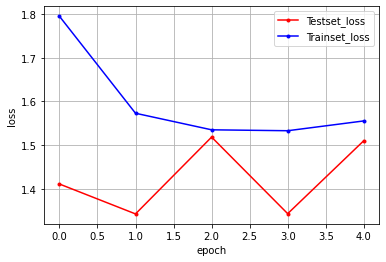

In [22]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

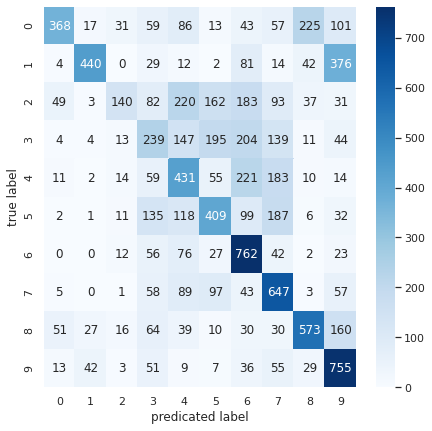

In [23]:
## 혼돈행렬을 이용한 정확도 평가(모델평가)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

results = model.predict(X_test)

#혼돈행렬만들기
plt.figure(figsize=(7,7))
cm=confusion_matrix(np.argmax(Y_test, axis=-1), np.argmax(results, axis=-1))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')

plt.xlabel('predicated label')
plt.ylabel('true label')

plt.show()

In [25]:
#[미션8] 테스트데이터 예측 값 시각화
#데이터 오차 여부를 데이터프레임으로 제작해서 csv 저장하기
dic=[]
for i in range(len(Y_test)):
  예측=X_test[i:i+1]
  y예측값=model.predict(예측)
  dic.append({'번호: ': i, '예측값': np.argmax(y예측값), '실제값':np.argmax(Y_test[i])})

In [35]:
dict_lst

,번호,예측값,실제값
0,NaN,3,3
1,NaN,8,8
2,NaN,8,8
3,NaN,1,0
4,NaN,6,6
...,...,...,...
9995,NaN,7,8
9996,NaN,5,3
9997,NaN,5,5
9998,NaN,6,1


In [41]:
import pandas as pd
dict_lst=pd.DataFrame(dic, columns=['번호', '예측값', '실제값'], index=range(len(dic)))
dict_lst.drop('번호', axis=1, inplace=True)
dict_lst


,예측값,실제값
0,3,3
1,8,8
2,8,8
3,1,0
4,6,6
...,...,...
9995,7,8
9996,5,3
9997,5,5
9998,6,1


In [46]:
dict_lst['예측값'].values

array([3, 8, 8, ..., 5, 6, 7])

In [59]:
비고=[]
cnt=len(dict_lst)
for i in range(cnt):
  if (dict_lst['예측값'][i:i+1] == dict_lst['실제값'][i:i+1]).any():
    비고.append('O')
  else: 
    비고.append('X')
비고

비고 
dict_lst['비고']=비고
dict_lst.to_csv('예측실제비교.csv', encoding='euc-kr')
pd.read_csv('예측실제비교.csv', encoding='euc-kr')

,Unnamed: 0,예측값,실제값,비고
0,0,3,3,O
1,1,8,8,O
2,2,8,8,O
3,3,1,0,X
4,4,6,6,O
...,...,...,...,...
9995,9995,7,8,X
9996,9996,5,3,X
9997,9997,5,5,O
9998,9998,6,1,X


In [54]:
dict_lst.columns

Index(['예측값', '실제값', '비고'], dtype='object')

In [46]:
# X_test와 Y_test값의 0:10개의 데이터셋을 출력합니다

In [55]:
#[미션9] 실제 사진으로 작업해봅니다.
#### y값이없는 새로운 사진으로 예측
img=Image.open('테스트비행기.jpg')
img=img.resize((32,32))   ## 전제조건, resize는 모델링할때 가로세로 사이즈로 해야함.
img=np.array(img)/255     # 스케일링을 진행합니다.
img=np.expand_dims(img,0) # 4차원 배열이 될수있도록 함
print(np.argmax(model.predict(img)))

0


In [56]:
y예측값=model.predict(img) 
예측=['비행기','자동차','새','고양이','사슴','개','개구리','말','배','트럭']
print(예측[np.argmax(y예측값)]) 

비행기
